In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcs.analysis.analysis import *
%matplotlib inline

In [3]:
band = 'r'

In [4]:
def reader(n_subarray):
    return pd.read_csv('../data/merged/{}/{}_band/lc_{}.csv'.format(obj, band, n_subarray), nrows=50000, index_col = ID, dtype = {'catalogue': np.uint8, 'mag_ps': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})

In [5]:
obj = 'qsos'
ID  = 'uid'
dr = analysis(ID)
dr.read_in(reader, redshift=False)

In [16]:
def cadence(mjd):
    diff = mjd[1:] - mjd[:-1]
    return min(diff)

In [19]:
min_time_sep = dr.df['mjd'].groupby('uid').apply(cadence)

[None]

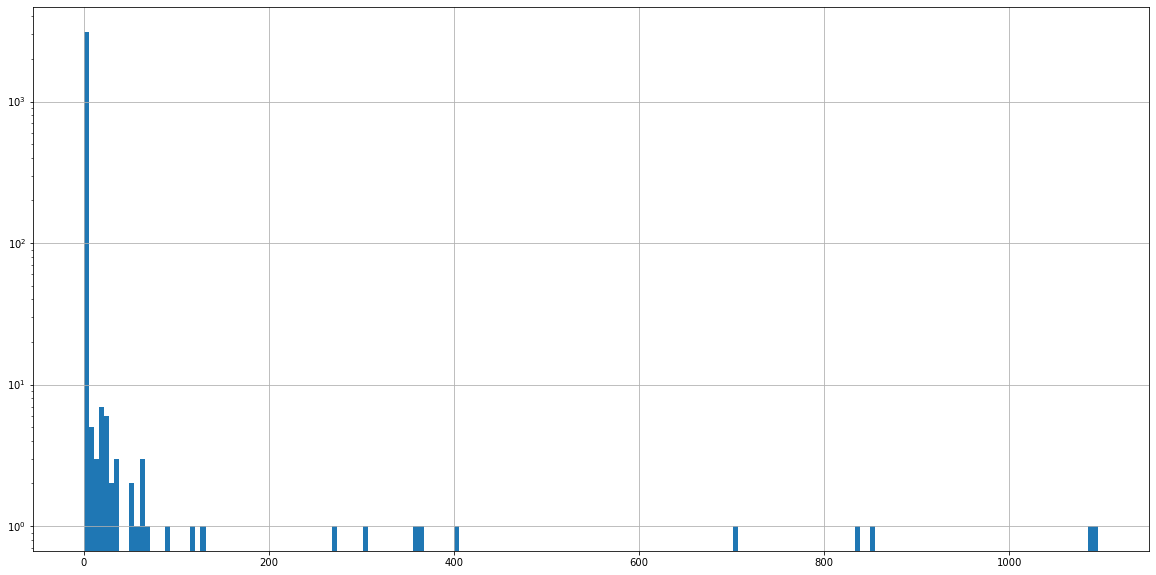

In [21]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
min_time_sep.hist(bins=200, ax=ax)
ax.set(yscale='log')

In [26]:
min_time_sep

uid
1         0.010567
2         0.001822
3         0.000451
4         0.000451
5         0.010451
            ...   
423704    0.000000
423705    0.000914
423706    0.008411
423707    0.000463
423708    0.000451
Name: mjd, Length: 3153, dtype: float64